In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Paths to the train and test directories
train_dir = "C:/crop and weed/dataset/train/"
test_dir = "C:/crop and weed/dataset/test/"

# Data Augmentation and Image Generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, validation_data=test_generator, epochs=10)

# Save the trained model
model.save("crop_vs_weed_model.h5")


Found 1039 images belonging to 2 classes.
Found 261 images belonging to 2 classes.


c:\Users\MUBEEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\MUBEEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.4947 - loss: 4.5870 - val_accuracy: 0.5709 - val_loss: 0.6445
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6144 - loss: 0.5906 - val_accuracy: 0.9502 - val_loss: 0.2850
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8981 - loss: 0.2582 - val_accuracy: 0.9157 - val_loss: 0.2150
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9455 - loss: 0.1505 - val_accuracy: 0.9579 - val_loss: 0.1316
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9574 - loss: 0.1135 - val_accuracy: 0.9655 - val_loss: 0.1059
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9861 - loss: 0.0576 - val_accuracy: 0.9693 - val_loss: 0.0752
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9986 - loss: 0.0100 - val_accuracy: 0.9693 - val_loss: 0.0776
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9964 - loss: 0.0181 - val_accuracy: 0.9808 - val_loss:

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Paths to the train and test directories
train_dir = "C:/crop and weed/dataset/train/"
test_dir = "C:/crop and weed/dataset/test/"

# Data Augmentation (applied to training data to improve generalization)
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    rotation_range=30,       # Randomly rotate images by up to 30 degrees
    width_shift_range=0.2,   # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Random horizontal flips
    fill_mode='nearest'      # Fill pixels when shifting
)

# For test data, we only normalize the pixel values (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the train and test directories
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

# Build an improved CNN model with Dropout to reduce overfitting
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),  # Dropout after pooling to prevent overfitting

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),  # Dropout after the second pooling layer

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),  # Higher dropout for fully connected layers
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with a reduced learning rate to fine-tune weight updates
model.compile(optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model (with validation data)
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Save the improved model
model.save("crop_vs_weed_model_improved.h5")

# Print completion message
print("Model training complete and saved as 'crop_vs_weed_model_improved.h5'")


Found 1039 images belonging to 2 classes.
Found 261 images belonging to 2 classes.
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.5448 - loss: 0.8983 - val_accuracy: 0.8438 - val_loss: 0.6491
Epoch 2/10
 1/32 ━━━━━━━━━━━━━━━━━━━━ 30s 989ms/step - accuracy: 0.7188 - loss: 0.5990

c:\Users\MUBEEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.7188 - loss: 0.5990 - val_accuracy: 0.5938 - val_loss: 0.6409
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.6853 - loss: 0.6059 - val_accuracy: 0.8594 - val_loss: 0.5399
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.8000 - loss: 0.4494 - val_accuracy: 0.8750 - val_loss: 0.5378
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8247 - loss: 0.4614 - val_accuracy: 0.8594 - val_loss: 0.3818
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.8125 - loss: 0.3915 - val_accuracy: 0.8594 - val_loss: 0.3872
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8742 - loss: 0.3379 - val_accuracy: 0.8633 - val_loss: 0.3858
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9375 - loss: 0.2118 - val_accuracy: 0.8477 - val_loss: 0.4031
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.8915 - loss: 0.2894 - val_accuracy: 0.8672 - val_loss: 0.

Model training complete and saved as 'crop_vs_weed_model_improved.h5'


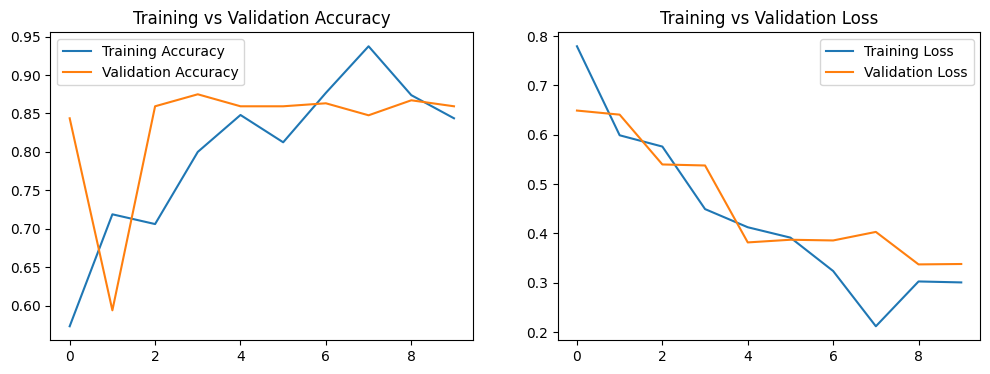

In [4]:
import matplotlib.pyplot as plt

# Plot training vs validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()
